In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#reading data
data=pd.read_csv('/content/drive/MyDrive/imdb_movies.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [ ]:
#check for null values
data.isnull().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [ ]:
#drop null values
data=data.dropna()

In [ ]:
data["date_x"]=data["date_x"].str.strip()
data["date_x"]=pd.to_datetime(data["date_x"],format="%m/%d/%Y")
# Split year and month in seperate columns
data["Release_year"]=data["date_x"].dt.year
data["Release_month"]=data["date_x"].dt.month

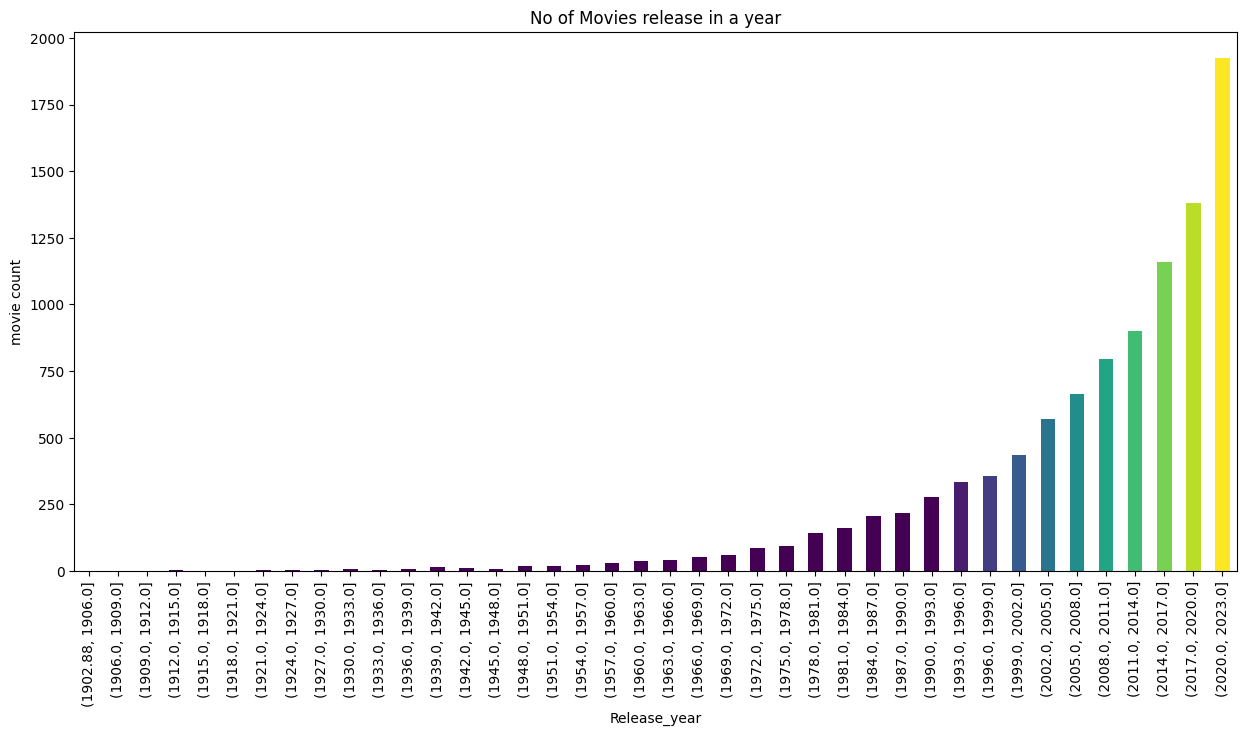

In [ ]:
# plot  between year and number of movies

colors = plt.cm.viridis(np.linspace(-3, 1, 40))  #to create some color combinations
plt.figure(figsize=(15,7))
data.groupby(pd.cut(data["Release_year"],bins=40))["names"].agg("count").plot(kind="bar",color=colors)
plt.title("No of Movies release in a year")
plt.ylabel("movie count")
plt.show()

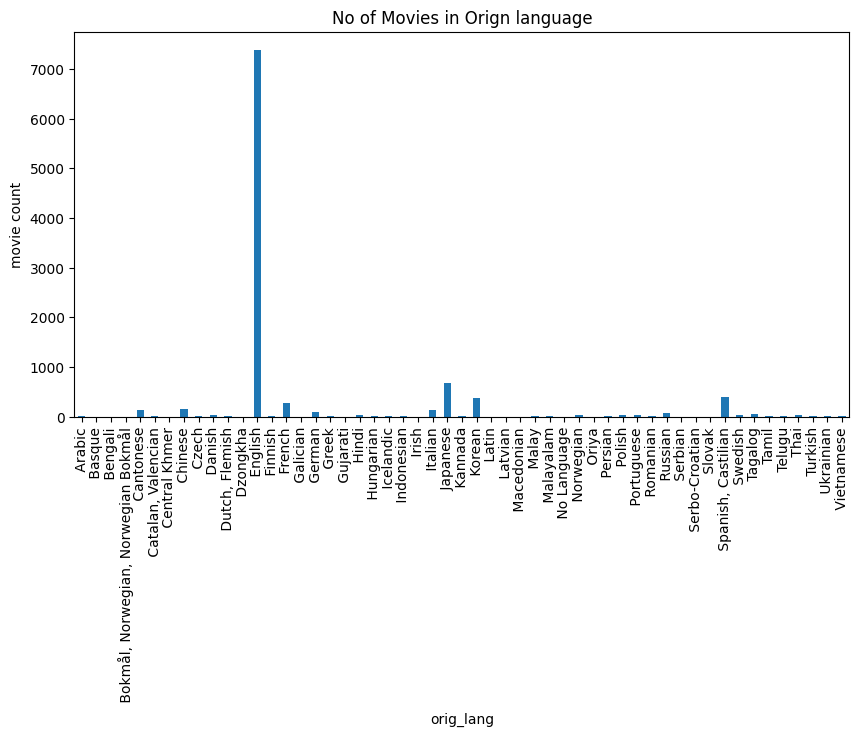

In [ ]:
# plot between no of movies in their orgin language
plt.figure(figsize=(10,5))
data.groupby("orig_lang")["names"].agg("count").plot(kind="bar")
plt.title("No of Movies in Orign language")
plt.ylabel("movie count")
plt.show()

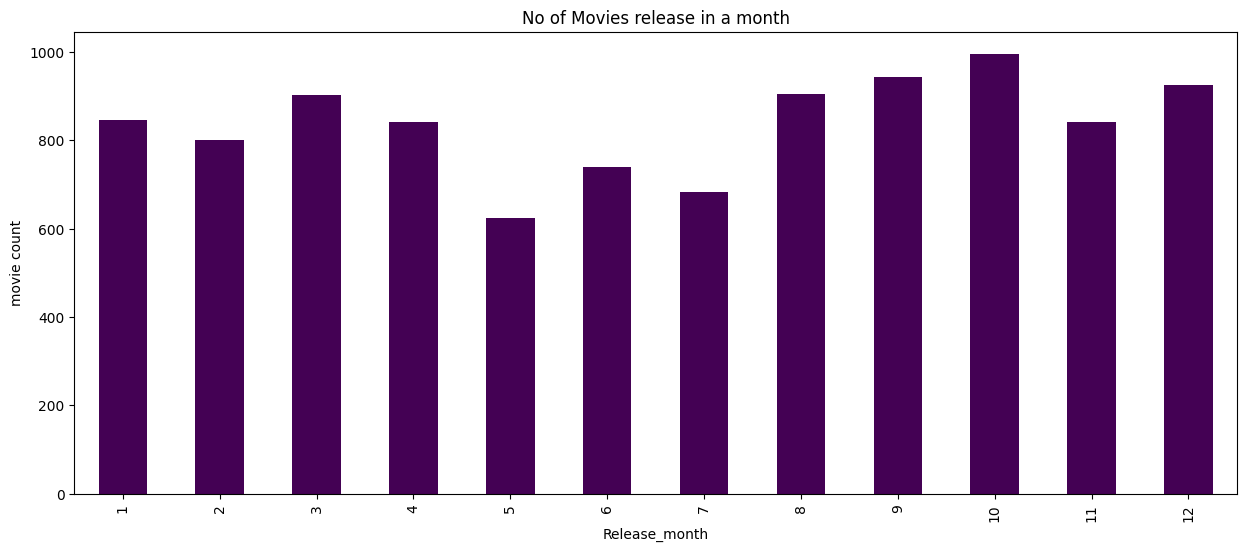

In [ ]:
#plot between month and number of movies
plt.figure(figsize=(15,6))

data.groupby("Release_month")["names"].agg("count").plot(kind="bar",color=colors)

#data.groupby("Release_month")["names"].agg("count").plot(kind="line",color="red")

plt.title("No of Movies release in a month")
plt.ylabel("movie count")
plt.show()

In [ ]:
#create one reference copy for build recomendation system
recom_data=data.copy()

In [ ]:
# importing basic library for movie rec
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer #minig and nlp
from sklearn.metrics.pairwise import cosine_similarity #similarity b/t docs

In [ ]:
# creating new column index
recom_data['index'] = range(0, len(recom_data))
# move the column to begining of the dataset
recom_data = recom_data.set_index('index').reset_index()

In [ ]:
# select columns to find patterns b/w movies
selected_features = ['genre','crew',"orig_lang"]
print(selected_features)

for feature in selected_features:
    recom_data[feature] = recom_data[feature].fillna('')

# combine the selected features
combined_features = recom_data['genre']+' '+recom_data['overview']+' '+recom_data['crew']

['genre', 'crew', 'orig_lang']


In [ ]:
# initialize model
vectorizer = TfidfVectorizer()

# fit the data into the  model
feature_vectors = vectorizer.fit_transform(combined_features)

# getting the similarity scores using cosine similarity
similarity = cosine_similarity(feature_vectors)

In [ ]:
# make the recommendation based on your movie which you like
movie_name = input("Enter a movie name: ")

#movie titles in a list
titlelist=recom_data['names'].tolist()

#finding closest match acc to our given movie
findMatch = difflib.get_close_matches(movie_name, titlelist)
print("Similar names: ", findMatch,"\n")

closestMatch = findMatch[0]

movieIndex = recom_data[recom_data.names==closestMatch]['index'].values[0]

similarity_score = list(enumerate(similarity[movieIndex]))

sortSimilar = sorted(similarity_score, key=lambda x:x[1], reverse = True)

print('Movies suggested for you: \n')
i=1

for movie in sortSimilar:
  index = movie[0]
  indexTitle = recom_data[recom_data.index==index]['names'].values[0]
  if(i<10):
    print(i,'.',indexTitle)
    i+=1

Enter a movie name: iron man 3
Similar names:  ['Iron Man 3', 'Iron Man 2', 'Iron Man'] 

Movies suggested for you: 

1 . Iron Man 3
2 . Iron Man 2
3 . Iron Man
4 . Spider-Man: Homecoming
5 . The Invincible Iron Man
6 . Avengers: Age of Ultron
7 . Captain America: Civil War
8 . Iron Man: Rise of Technovore
9 . Shang-Chi and the Legend of the Ten Rings
